In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [19]:
irisdf = pd.read_csv('datasets/IRIS.csv')
irisdf.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
irisdf['species_enc'] = labelEncoder.fit_transform(irisdf['species'])

In [22]:
# oddelime predikujici featury od target variable
# y - target variable
y = irisdf['species_enc'].values
# x - hodnoty z petal_lengh a petal_width
x = irisdf[['petal_length', 'petal_width']].values

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2)
# Ytrain, Ytest = train_test_split(ydf,test_size=0.2)

In [24]:
from sklearn.preprocessing import StandardScaler
# udelame standardizaci numerickych features pomoci StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.fit_transform(Xtest)

In [25]:
# klasifikacni algoritmus K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
# klasifikator knn - nastavujeme hodnotu pro k cili pocet nejblizsich sousedu ktere bere algoritmus do uvahy
knn = KNeighborsClassifier(n_neighbors = 3)
# pomoci fit natrenujeme nas algoritmus na trenovacih datech na xtrain(feature) a ytrain(target)
# .fit fitting model to the data (přizpůsobení modelu datům) - popis principu
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(n_neighbors=3)

In [26]:
# udelame pedikci
# normalizujeme hodnoty pomoci standart scalera protoze modelje na normalizovanych datech
Xnew = sc.transform([[1.4, 0.2]])
# pomoci predict spocitame hodnotu naseho klasifikatora knn
new_prediction = knn.predict(Xnew)
print(f'Predikce: {new_prediction}')
# hodnota targetu je 0

Predikce: [0]


In [27]:
# predikce pro nas xtest
Ypred = knn.predict(Xtest)
print(f'Test set - Predikce: {Ypred}')

Test set - Predikce: [0 1 1 1 2 0 2 1 0 1 2 0 0 2 1 1 0 1 1 1 1 1 0 2 2 1 2 0 2 2]


In [28]:
import collections

In [29]:
# pro lepsi prehlednost ucesem vystup
collections.Counter(Ypred)

Counter({0: 8, 1: 13, 2: 9})

# Hodnoceni modelu



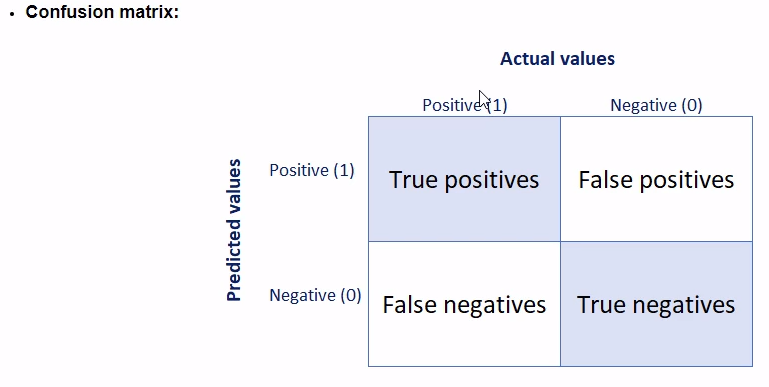

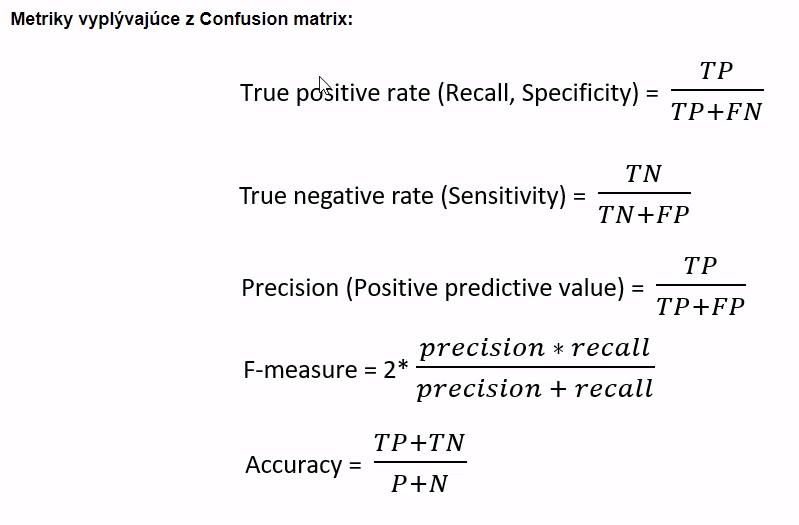

In [30]:
# porovnani predikce se skutecnou hodnotou a ohodnotit nas model
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
# inicialiyujeme si confuision matrix a jako parametry zadame skutocne hodnoty 
# targetu a jejich predikce 
cm = confusion_matrix(Ytest, Ypred)
print(cm)
# vytvorime si hodnotu score do ktere vlozime hodnotu accury pro testset
score = accuracy_score(Ytest, Ypred)
print(f'Accuracy modelu je: {score}')

[[ 8  0  0]
 [ 0 10  0]
 [ 0  3  9]]
Accuracy modelu je: 0.9


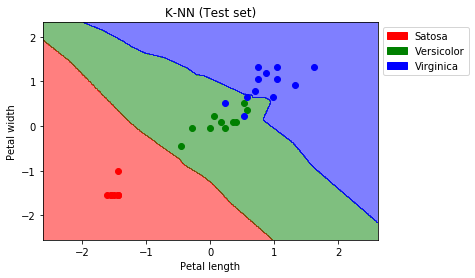

In [32]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# decision boundary
X_set, y_set = Xtest, Ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.50, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
red_patch = mpatches.Patch(color='red', label='Satosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
plt.legend(handles=[red_patch, green_patch, blue_patch], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Vylepseni modelu

Naučíme se, co jsou hyperparametry modelu. Ukážeme si, jak je můžeme ladit pomocí Grid search a Cross validation.

In [33]:
from sklearn.model_selection import GridSearchCV

# vytvorime slovnik kam zapiseme vsechny hodnoty ktere budeme chtit navzajem vyzkouset
select_params = {'n_neighbors':range(1,11),
                'weights':['uniform','distance'],
                'metric':['euclidean','manhattan','chebyshev','minkowski']}
# inicializujeme grid_knn pomoci gridsearch
grid_knn = GridSearchCV(knn,select_params,cv=5)
grid_knn.fit(Xtrain,Ytrain)
# vypiseje nejlepsi parametry pomoci best_params_
print('Najlepsie parametre su:{}'.format(grid_knn.best_params_))
# vypiseje nejlepsi skore pomoci best_score_
print('Najlepsie priemerne skore na training sete je:{}'.format(grid_knn.best_score_))


Najlepsie parametre su:{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Najlepsie priemerne skore na training sete je:0.9833333333333332


# Feature engineering

Vysvětlíme si pojem Feature engineering a ukážeme si několik technik, které mohou být při hledání nových features užitečné.

In [35]:
# Pri feature engineering data a prediktory vytvarime
# Vytvorime si plochu iris listu

irisdf['Petal_Area'] = irisdf['petal_width'] * irisdf['petal_length']
irisdf['Sepal_Area'] = irisdf['sepal_width'] * irisdf['sepal_length']
irisdf.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,species_enc,Petal_Area,Sepal_Area
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0.28,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0.28,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0.26,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0.30,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0.28,18.00
5,5.4,3.9,1.7,0.4,Iris-setosa,0,0.68,21.06
6,4.6,3.4,1.4,0.3,Iris-setosa,0,0.42,15.64
7,5.0,3.4,1.5,0.2,Iris-setosa,0,0.30,17.00
8,4.4,2.9,1.4,0.2,Iris-setosa,0,0.28,12.76
9,4.9,3.1,1.5,0.1,Iris-setosa,0,0.15,15.19


In [47]:
import re
# extrahovani ciselne hodnty z textu
text = 'teplota je 29.637 C'
pattern = '\d+.\d+'
extrakt = re.findall(pattern,text)
print(extrakt)

['29.637']


In [51]:
from sklearn.preprocessing import Binarizer
# Binarizace prevod pouze na dve moznosti
# Seznam poctu nakupu
nakupy = [[6],[2],[4]]
# hranice rozdeleni je 5 nakupu
binarizer = Binarizer(threshold = 5)
vip = binarizer.fit_transform(nakupy)
print(vip)

[[1]
 [0]
 [0]]
